In [ ]:

# Get data (10% of labels)
import zipfile

# Download data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip", "r")
zip_ref.extractall()
zip_ref.close()


--2023-10-20 04:01:23--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.207, 74.125.197.207, 74.125.135.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   215MB/s    in 0.7s    

2023-10-20 04:01:24 (215 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:

# How many images in each folder?
import os

# Walk through 10 percent data directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

print("Training images:")
train_data_10_percent = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMAGE_SHAPE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="categorical")

print("Testing images:")
test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=IMAGE_SHAPE,
                                              batch_size=BATCH_SIZE,
                                              class_mode="categorical")

Training images:
Found 750 images belonging to 10 classes.
Testing images:
Found 2500 images belonging to 10 classes.


In [ ]:
# create tensorboard callbacks
import datetime
def create_tensorboard_callback(dir_name,experiment_name):
  log_dir=dir_name+'/'+experiment_name+'/'+datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f'saving tensorboard log files to:{log_dir}')
  return tensorboard_callback

In [ ]:

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [ ]:
efficientnet_url='https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1'
resnet_url="https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

In [ ]:
def create_model(model_url,num_classes=10):
  feauture_extract_layer=hub.KerasLayer(model_url,trainable=False,
                                        input_shape=IMAGE_SHAPE+(3,))
  model=tf.keras.Sequential([
      feauture_extract_layer,
      layers.Dense(num_classes,activation ='softmax')
  ])
  return model

In [ ]:
# creating resnet model
resnet_model=create_model(resnet_url,num_classes=train_data_10_percent.num_classes)

In [ ]:
resnet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [ ]:
resnet_history=resnet_model.fit(train_data_10_percent,
                 epochs=5,
                 steps_per_epoch=len(train_data_10_percent),
                 validation_data=test_data,
                 validation_steps=len(test_data_),
                 callbacks=[create_tensorboard_callback(dir_name='tensorflow_hub',experiment_name='resnet50v2')])

saving tensorboard log files to:tensorflow_hub/resnet50v2/20231020-053018
Epoch 1/5
24/24 [==============================] - 11s 450ms/step - loss: 0.2971 - accuracy: 0.9467 - val_loss: 0.6576 - val_accuracy: 0.7860
Epoch 2/5
24/24 [==============================] - 14s 611ms/step - loss: 0.2497 - accuracy: 0.9533 - val_loss: 0.6445 - val_accuracy: 0.7908
Epoch 3/5
24/24 [==============================] - 11s 481ms/step - loss: 0.2078 - accuracy: 0.9747 - val_loss: 0.6427 - val_accuracy: 0.7884
Epoch 4/5
24/24 [==============================] - 11s 450ms/step - loss: 0.1789 - accuracy: 0.9840 - val_loss: 0.6366 - val_accuracy: 0.7912
Epoch 5/5
24/24 [==============================] - 12s 494ms/step - loss: 0.1564 - accuracy: 0.9867 - val_loss: 0.6365 - val_accuracy: 0.7912


In [ ]:
# wow! above model is only  used 10 percent of dataset
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 2048)              23564800  
                                                                 
 dense_1 (Dense)             (None, 10)                20490     
                                                                 
Total params: 23585290 (89.97 MB)
Trainable params: 20490 (80.04 KB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


In [ ]:
from IPython.core import history
import matplotlib.pyplot as plt

def plot_loss_accuracy(history):
  loss=history.history['loss']
  val_loss=history.history['val_loss']
  accuracy=history.history['accuracy']
  val_accuracy=history.history['val_accuracy']
  epochs=range(len(history.history['loss']))

  plt.plot(epochs,loss,label='training_loss')
  plt.plot(epochs,val_loss,label='val_loss')
  plt.title('Loss')
  plt.xlabel('epochs')
  plt.legend()


  plt.figure()
  plt.plot(epochs,accuracy,label='training_accuracy')
  plt.plot(epochs,val_accuracy,label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend();


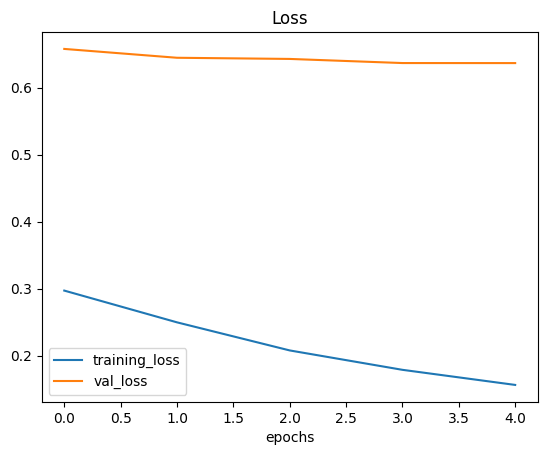

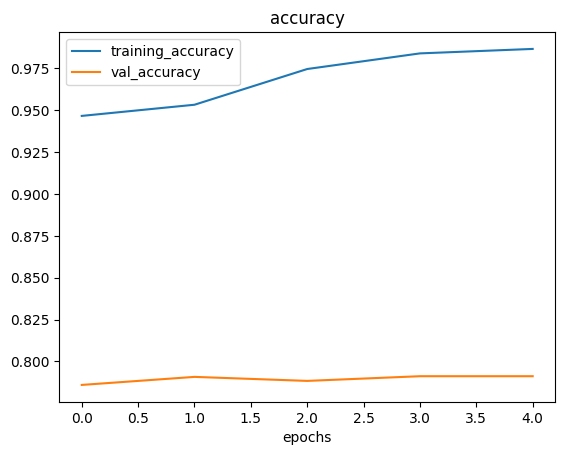

In [ ]:
plot_loss_accuracy(resnet_history)

In [ ]:
def create_model(model_url,num_classes=10):
  feauture_extract_layer=hub.KerasLayer(model_url,trainable=False,
                                        input_shape=IMAGE_SHAPE+(3,))
  model=tf.keras.Sequential([
      feauture_extract_layer,
      layers.Dense(num_classes,activation ='softmax')
  ])
  return model

In [ ]:
efficientnet_model=create_model(model_url=efficientnet_url,num_classes=10)

In [ ]:
efficientnet_model.compile(loss='categorical_crossentropy',
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=['accuracy'])

In [ ]:
efficientnet_history=efficientnet_model.fit(train_data_10_percent,
                                            epochs=5,
                                            steps_per_epoch=len(train_data_10_percent),
                                            validation_data=test_data,
                                            validation_steps=len(test_data),
                                            callbacks=[create_tensorboard_callback(dir_name='tensorflow_hub',experiment_name='efficientnetB0')])

saving tensorboard log files to:tensorflow_hub/efficientnetB0/20231020-054216
Epoch 1/5
24/24 [==============================] - 21s 511ms/step - loss: 1.8567 - accuracy: 0.4307 - val_loss: 1.2841 - val_accuracy: 0.7484
Epoch 2/5
24/24 [==============================] - 11s 454ms/step - loss: 1.0578 - accuracy: 0.7747 - val_loss: 0.8581 - val_accuracy: 0.8188
Epoch 3/5
24/24 [==============================] - 10s 414ms/step - loss: 0.7499 - accuracy: 0.8280 - val_loss: 0.6902 - val_accuracy: 0.8468
Epoch 4/5
24/24 [==============================] - 13s 549ms/step - loss: 0.6067 - accuracy: 0.8627 - val_loss: 0.6064 - val_accuracy: 0.8556
Epoch 5/5
24/24 [==============================] - 10s 413ms/step - loss: 0.5108 - accuracy: 0.8800 - val_loss: 0.5499 - val_accuracy: 0.8664


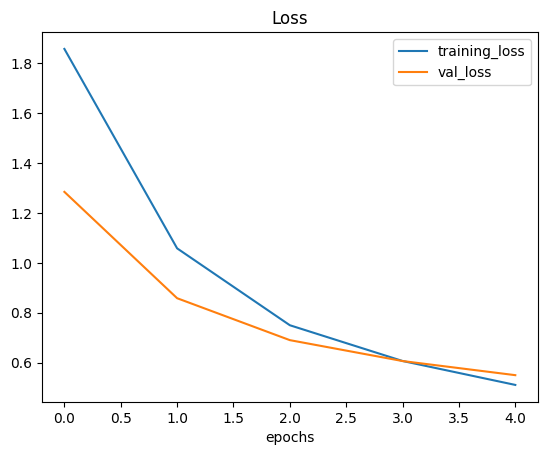

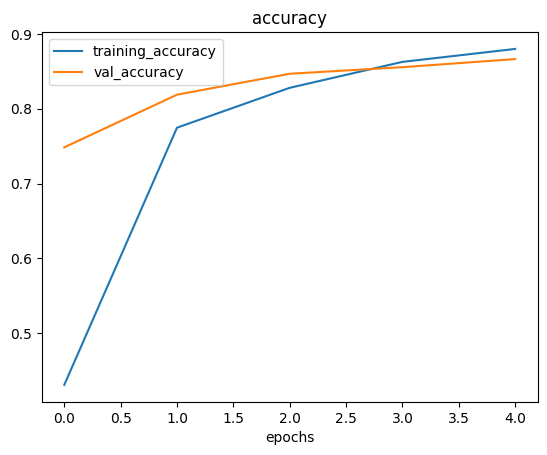

In [ ]:
plot_loss_accuracy(efficientnet_history)

In [ ]:
# compare our models with tensor board
!tensorboard dev upload --logdir ./tensorflow_hub/ \
 --name 'EfficientNetB0 vs Resnet50v2' \
 --one_shot

2023-10-20 06:12:04.337429: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./tensorflow_hub/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

To sign in with the TensorBoard uploader:

1. On your computer or phone, visit:

   https://www.google.com/device

2. Sign in with your Google account, then enter:

   DSXC-VLWZ



****************************************************************
*************